# Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

In [2]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key']

In [3]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status', parse_dates = ['created_date'], usecols = columns_used)

In [4]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-18 08:55:45,44090810,HEAT/HOT WATER,"11,207.000",525 WYONA STREET,WYONA STREET,BROOKLYN,BROOKLYN,40.666,-73.891,RESIDENTIAL BUILDING
1,2019-10-18 17:21:25,44091099,HEAT/HOT WATER,"10,472.000",1155 EVERGREEN AVENUE,EVERGREEN AVENUE,BRONX,BRONX,40.827,-73.881,RESIDENTIAL BUILDING
2,2019-10-18 20:09:18,44088305,HEAT/HOT WATER,"10,455.000",718 EAST 149 STREET,EAST 149 STREET,BRONX,BRONX,40.813,-73.909,RESIDENTIAL BUILDING
3,2019-10-18 10:47:39,44089860,UNSANITARY CONDITION,"10,031.000",625 WEST 135 STREET,WEST 135 STREET,NEW YORK,MANHATTAN,40.820,-73.956,RESIDENTIAL BUILDING
4,2019-10-18 19:10:48,44091617,PLUMBING,"10,452.000",14 MARCY PLACE,MARCY PLACE,BRONX,BRONX,40.839,-73.918,RESIDENTIAL BUILDING


In [5]:
df.shape

(5879076, 11)

In [6]:

df.dtypes

created_date        datetime64[ns]
unique_key                   int64
complaint_type              object
incident_zip               float64
incident_address            object
street_name                 object
city                        object
borough                     object
latitude                   float64
longitude                  float64
location_type               object
dtype: object

In [9]:
# combine HEAT/HOT WATER complaint to HEATING complaint as after 2014 it is same

df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])


In [10]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            2048873
PLUMBING                   704757
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       441452
PAINT - PLASTER            361258
PAINT/PLASTER              342494
ELECTRIC                   304502
NONCONST                   260890
DOOR/WINDOW                201318
WATER LEAK                 189361
GENERAL                    147709
FLOORING/STAIRS            135881
APPLIANCE                  110601
HPD Literature Request      52830
SAFETY                      50472
OUTSIDE BUILDING             7062
ELEVATOR                     6534
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complaint_type, dtype: int64

In [11]:
df.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-18 08:55:45,44090810,HEAT/HOT WATER,"11,207.000",525 WYONA STREET,WYONA STREET,BROOKLYN,BROOKLYN,40.666,-73.891,RESIDENTIAL BUILDING
1,2019-10-18 17:21:25,44091099,HEAT/HOT WATER,"10,472.000",1155 EVERGREEN AVENUE,EVERGREEN AVENUE,BRONX,BRONX,40.827,-73.881,RESIDENTIAL BUILDING
2,2019-10-18 20:09:18,44088305,HEAT/HOT WATER,"10,455.000",718 EAST 149 STREET,EAST 149 STREET,BRONX,BRONX,40.813,-73.909,RESIDENTIAL BUILDING
3,2019-10-18 10:47:39,44089860,UNSANITARY CONDITION,"10,031.000",625 WEST 135 STREET,WEST 135 STREET,NEW YORK,MANHATTAN,40.820,-73.956,RESIDENTIAL BUILDING
4,2019-10-18 19:10:48,44091617,PLUMBING,"10,452.000",14 MARCY PLACE,MARCY PLACE,BRONX,BRONX,40.839,-73.918,RESIDENTIAL BUILDING


In [13]:
# change the 'created_date' object to datetime format
df['created_date'] =  pd.to_datetime(df['created_date'])
df.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-18 08:55:45,44090810,HEAT/HOT WATER,"11,207.000",525 WYONA STREET,WYONA STREET,BROOKLYN,BROOKLYN,40.666,-73.891,RESIDENTIAL BUILDING
1,2019-10-18 17:21:25,44091099,HEAT/HOT WATER,"10,472.000",1155 EVERGREEN AVENUE,EVERGREEN AVENUE,BRONX,BRONX,40.827,-73.881,RESIDENTIAL BUILDING
2,2019-10-18 20:09:18,44088305,HEAT/HOT WATER,"10,455.000",718 EAST 149 STREET,EAST 149 STREET,BRONX,BRONX,40.813,-73.909,RESIDENTIAL BUILDING
3,2019-10-18 10:47:39,44089860,UNSANITARY CONDITION,"10,031.000",625 WEST 135 STREET,WEST 135 STREET,NEW YORK,MANHATTAN,40.820,-73.956,RESIDENTIAL BUILDING
4,2019-10-18 19:10:48,44091617,PLUMBING,"10,452.000",14 MARCY PLACE,MARCY PLACE,BRONX,BRONX,40.839,-73.918,RESIDENTIAL BUILDING


In [16]:
df.dtypes

created_date        datetime64[ns]
unique_key                   int64
complaint_type              object
incident_zip               float64
incident_address            object
street_name                 object
city                        object
borough                     object
latitude                   float64
longitude                  float64
location_type               object
dtype: object

In [19]:
# keep the column related to 'created_date' and their unique ID 'unique_key'. In my view, other features are not important as they are not 
# dependent on time

cols = [ 'borough', 'city', 'complaint_type','incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name']
df_ts = df.drop(cols, axis = 1)
df_ts.columns
df_ts.head()



,created_date,unique_key
0,2019-10-18 08:55:45,44090810
1,2019-10-18 17:21:25,44091099
2,2019-10-18 20:09:18,44088305
3,2019-10-18 10:47:39,44089860
4,2019-10-18 19:10:48,44091617


In [22]:
df_ts['date'] = df_ts['created_date'].map(lambda x: x.strftime('%Y-%m'))
df_ts['created_year'] = df_ts['created_date'].map(lambda x: x.strftime('%Y')).astype(int)
df_ts.head()

,created_date,unique_key,date,created_year
0,2019-10-18 08:55:45,44090810,2019-10,2019
1,2019-10-18 17:21:25,44091099,2019-10,2019
2,2019-10-18 20:09:18,44088305,2019-10,2019
3,2019-10-18 10:47:39,44089860,2019-10,2019
4,2019-10-18 19:10:48,44091617,2019-10,2019


In [24]:
# condition to remove year 2019 complaints from the dataset as it is incomplete yet
df_ts = df_ts[df_ts.created_year != 2019]
# keep the coloumn date in a fromat '%Y-%m'
df_ts = df_ts.drop(['created_date', 'created_year'], axis =1)
df_ts = df_ts.sort_values('date')
df_ts.head()

,unique_key,date
171351,15811767,2010-01
134291,15699241,2010-01
134292,15699242,2010-01
134293,15699243,2010-01
134294,15699244,2010-01


In [25]:
#  count the number of complaints 
df_ts = df_ts.groupby(['date']).count()['unique_key']

In [26]:
df_ts = pd.DataFrame(df_ts)
df_ts  = df_ts.rename(index=str, columns={"unique_key": "no_of_complaints"})

In [27]:
df_ts.index

Index(['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10',
       ...
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='object', name='date', length=108)

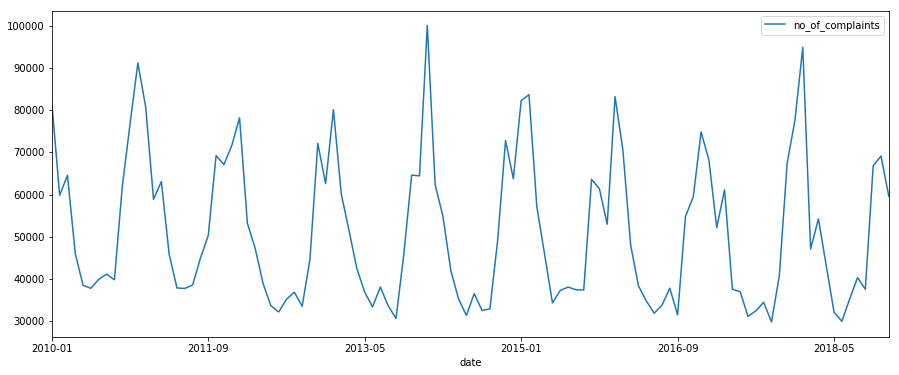

In [28]:
df_ts.plot(figsize=(15, 6))
plt.show()

In [32]:

df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts = df_ts.set_index('date')

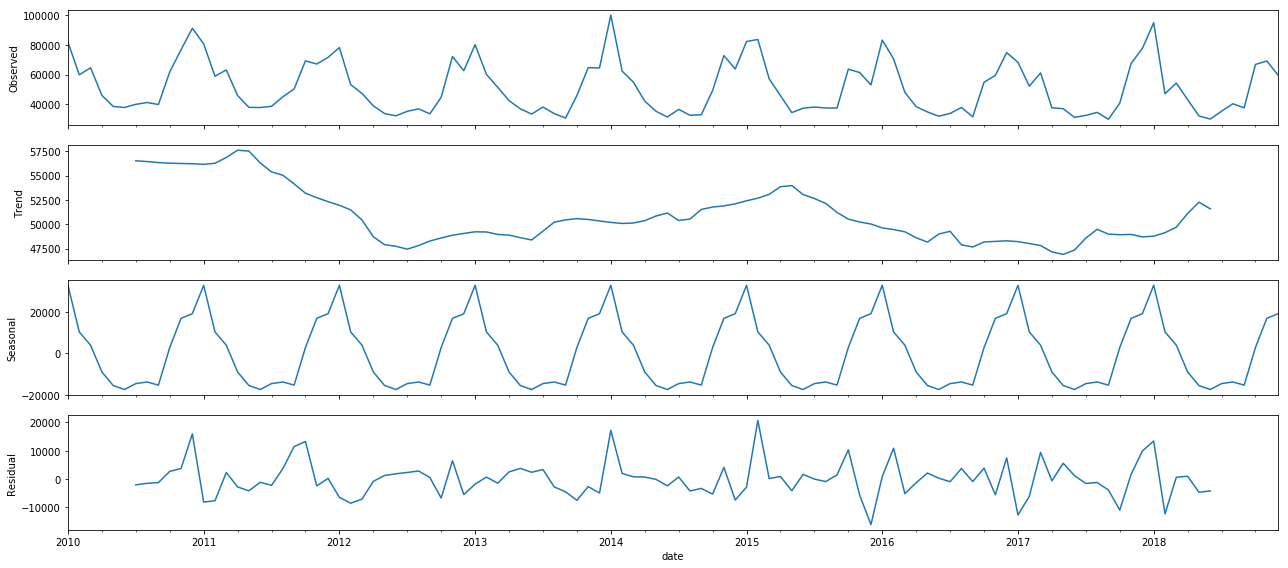

In [35]:
# trend, seasonality, and noise
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_ts, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
import itertools
import warnings
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_complaint_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [40]:
mod = sm.tsa.statespace.SARIMAX(df_ts,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7430      0.082     -9.084      0.000      -0.903      -0.583
ma.S.L12      -0.5179      0.095     -5.454      0.000      -0.704      -0.332
sigma2      1.081e+08   1.66e-10   6.51e+17      0.000    1.08e+08    1.08e+08


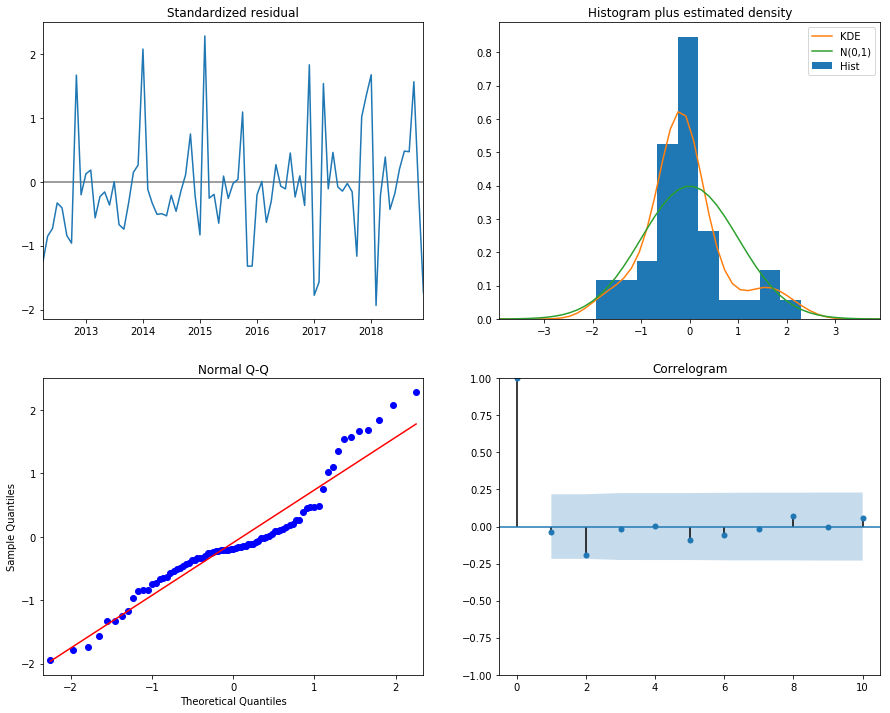

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1. This is a good indication that the residuals are approximatly normally distributed.
    
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.


In [42]:
pred = results.get_prediction(start=pd.to_datetime('2018-01'), dynamic=False)
pred_ci = pred.conf_int()

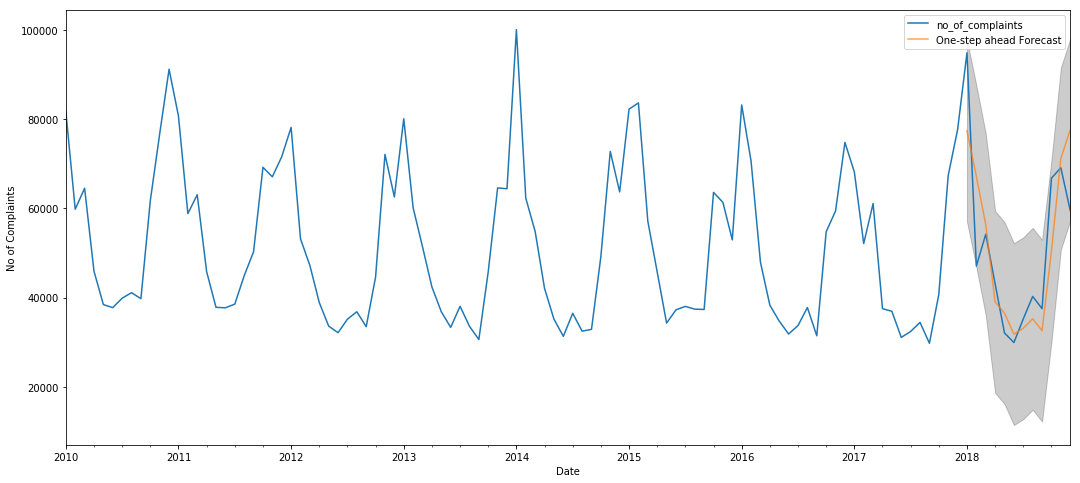

In [43]:
ax = df_ts['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')
plt.legend()

plt.show()

# We can notice that the interval of confidence is large.

In [44]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)

y_truth = df_ts['2018-01':]

# Compute the mean square error
mean_absolute_error = abs((y_forecasted[0] - y_truth['no_of_complaints'] ) ** 1).mean()
print('The Mean Absolute Error of our forecasts is {}'.format(round(mean_absolute_error, 2)))

The Mean Absolute Error of our forecasts is 8224.51


In [45]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


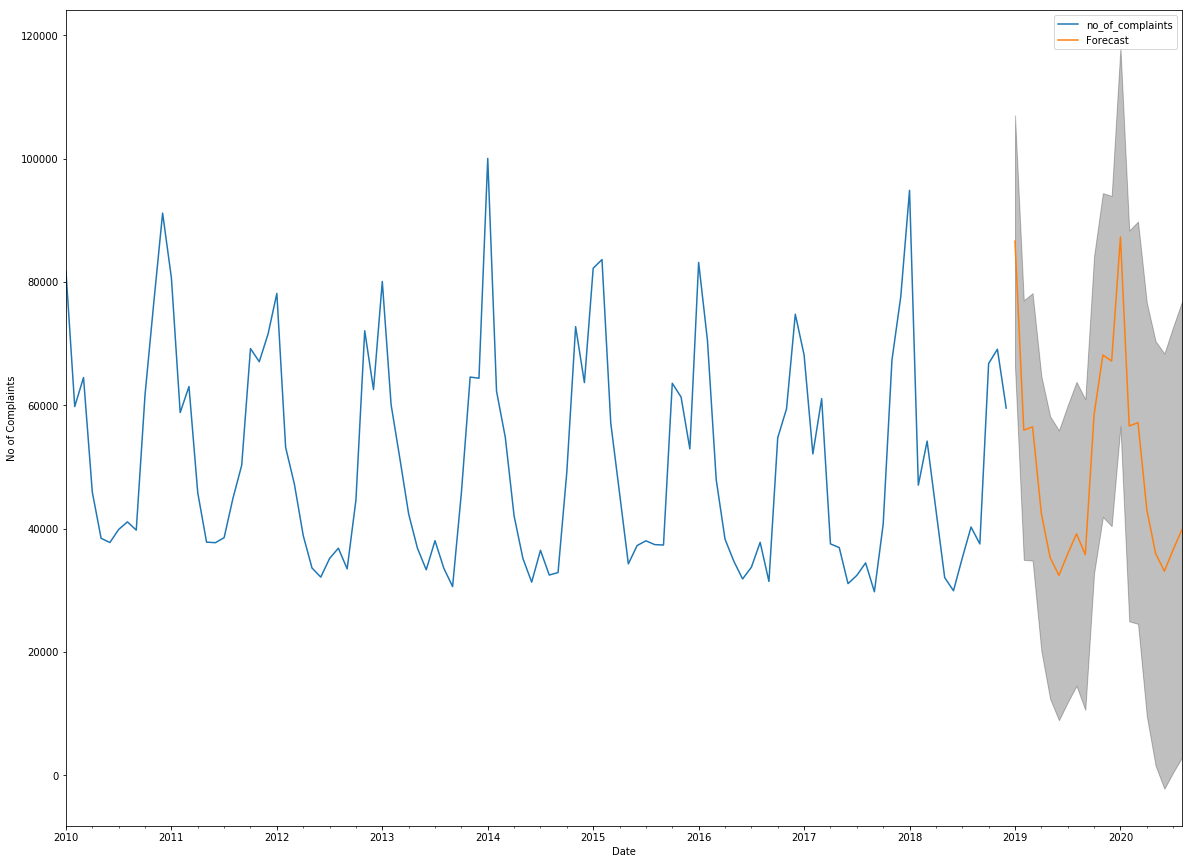

In [46]:
ax = df_ts.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('No of Complaints')

plt.legend()
plt.show()


# We can use ARIMA time series forcasting to predict the number of future complaints for certain type. 
